<a id="top"></a>
<div class="list-group" id="list-tab" role="tablist">
<h1 class="list-group-item list-group-item-action active" data-toggle="list" style='background:#005097; border:0' role="tab" aria-controls="home"><center>Inferência Estatística (GCC1625) - Trabalho 3</center></h1>

- Nome completo: <Vinicius Gonçalves Paraizo Borges>
- [Link para vídeo](<A>)

# (1) Correlação e covariância


Você é analista de dados de uma empresa de educação. Foram coletadas informações
sobre os seguintes atributos de alunos de um curso online:

- horas_estudo: número de horas que o aluno estudou na semana;
- nota_final: nota final no curso (0 a 100).

Seu objetivo é investigar a relação entre essas duas variáveis.

1. Cálculo Manual
    - Calcule a média de cada variável;
    - Calcule a covariância amostral:
        - $Cov(X,Y) = \frac{1}{n-1}*\sum_{i=1}^n (X_{i} - \bar{X})(Y_{i} - \bar{Y})$
    - Calcule a correlação de Pearson:
        - $\rho(X,Y) = \frac{Cov(X,Y)}{S_{X}S_{Y}}$

Use as funções np.mean(), np.std() e np.cov() para comparar seus resultados.

In [49]:
import numpy as np
import pandas as pd

np.random.seed (42)
horas_estudo = np.random.normal (10, 2, 30)
nota_final = 50 + 4 * horas_estudo + np.random.normal(0, 5,
30)
df = pd.DataFrame ({
'Horas de Estudo ': horas_estudo ,
'Nota Final ': nota_final,
})

# Código disponibilizado no enunciado da questão

In [3]:
df.iloc[:5]

,Horas de Estudo,Nota Final
0,10.993428,90.965180
1,9.723471,98.155277
2,11.295377,95.114022
3,13.046060,96.895684
4,9.531693,92.239498


In [4]:
# calcular a média das variáveis:

x_bar = df['Horas de Estudo '].mean()
y_bar = df['Nota Final '].mean()

print(x_bar)
print(y_bar)

9.623706208297927
87.88901248174199


In [17]:
df.iloc[0][df.columns[0]]

10.993428306022466

In [37]:
def covariance(x_bar,y_bar,df):
    desvios = []
    n = len(df)
    for i in range(n):
        x_i = df.iloc[i][df.columns[0]]
        y_i = df.iloc[i][df.columns[1]]
        desvio_x = x_i - x_bar
        desvio_y = y_i - y_bar
        desvios.append(desvio_x * desvio_y)
    
    sum = np.sum(desvios)
    cov = (1/(n-1))*sum
    return cov

In [ ]:
cov = covariance(x_bar,y_bar,df)

print(cov)

# Covariancia positiva !

13.788410270749694


In [ ]:
covariance = np.cov(df['Horas de Estudo '], df['Nota Final '])
print(covariance) # resultado igual !

[[ 3.24004628 13.78841027]
 [13.78841027 80.1403243 ]]


In [39]:
# Coeficiente de pearson:
# r = cov(x, y) / (σx * σy)

def pearson_coeff(cov,s1,s2):
    return cov / (s1*s2)

s1 = df['Horas de Estudo '].std()
s2 = df['Nota Final '].std()

p = pearson_coeff(cov,s1,s2)

p

0.8556832738480706

In [ ]:
pearson_coef = np.corrcoef(df['Horas de Estudo '], df['Nota Final '])[0, 1]

pearson_coef # Resultado igual !

0.8556832738480707

2. Visualização
    - Crie um gráfico de dispersão entre horas_estudo e nota_final;
    - Adicione uma linha de tendência linear;
    - Interprete o resultado: a relação é positiva, negativa ou nula?

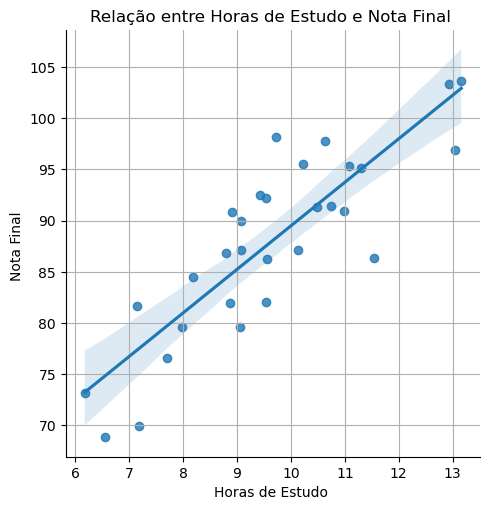

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lmplot(x='Horas de Estudo ', y='Nota Final ', data=df)
plt.title('Relação entre Horas de Estudo e Nota Final ')
plt.grid(True)
plt.show()

# Relação positiva: quando uma variável cresce, a outra cresce também.

3. Interpretação
    - O valor da correlação está mais próximo de 0, +1 ou –1? O que isso indica?
    - A covariância obtida é positiva ou negativa? O que isso significa no contexto?
    - Se a unidade da nota fosse alterada (ex: de 0–100 para 0–10), o valor da
correlação mudaria? E a covariância?

In [ ]:
# O valor da correlação está mais próximo de +1 do que de 0 (sem correlação) e muito menos de -1 (correlação negativa)
# Podemos ver isso através da matriz de correlação (covariância normalizada) - igual ao coef de pearson.

print(df[['Horas de Estudo ', 'Nota Final ']].corr(),'\n\n')

# Covariância obtida é positiva. Isso significa que se uma variável aumenta, a outra tem tendência em aumentar também.

# A unidade sendo alterada, o valor da covariância altera, pois a escala muda:
df['Nota Final - /10'] = df['Nota Final ']/10

cov_alt = np.cov(df['Horas de Estudo '], df['Nota Final - /10'])
print(f"cov: {cov}")
print(f"cov alt: {cov_alt[0][0]}\n\n")

# Porém, a correlação não mudaria, pois se trata da covariância normalizada (entre -1 e 1). Os desvios padrões se ajustam.
print(df[['Horas de Estudo ', 'Nota Final - /10']].corr())


                  Horas de Estudo   Nota Final 
Horas de Estudo           1.000000     0.855683
Nota Final                0.855683     1.000000 


cov: 13.788410270749694
cov alt: 3.240046277462607


                  Horas de Estudo   Nota Final - alt
Horas de Estudo           1.000000          0.855683
Nota Final - alt          0.855683          1.000000


4. Outras simulações
    - Gere um novo conjunto de dados em que a correlação entre horas_estudo
e nota_final seja próxima de zero;
    - Gere um conjunto com correlação negativa entre as variáveis.

In [61]:
# Conjunto em que correlação entre 'horas estudo' e 'nota final' seja próxima de zero
np.random.seed (42)
horas_estudo = np.random.normal (10, 2, 30)
nota_final = np.random.uniform(0, 100, 30) # numeros aleatórios entre 0 a 100
df = pd.DataFrame ({
'Horas de Estudo ': horas_estudo ,
'Nota Final ': nota_final,
})

df.corr()

,Horas de Estudo,Nota Final
Horas de Estudo,1.000000,-0.118644
Nota Final,-0.118644,1.000000


In [ ]:
# Conjunto em que correlação entre 'horas estudo' e 'nota final' seja negativa
np.random.seed (42)
horas_estudo = np.random.normal (10, 2, 30)
nota_final = np.random.normal(0, 100, 30) # numeros aleatórios entre 0 a 100
df = pd.DataFrame ({
'Horas de Estudo ': horas_estudo ,
'Nota Final ': nota_final,
})

df.corr()

# (2)